In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('lending_data.csv')

# Review the DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


# Preprocessing
Scale and transform the data for Machine learning

In [3]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [4]:
num_cols = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [5]:
df_scaled.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676


In [6]:
# Imbalance- Pre-processing analysis 
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [7]:
# Correlation Analysis (Feature selection) Sugggested by Instructor
corrs = df.corr()
corrs


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


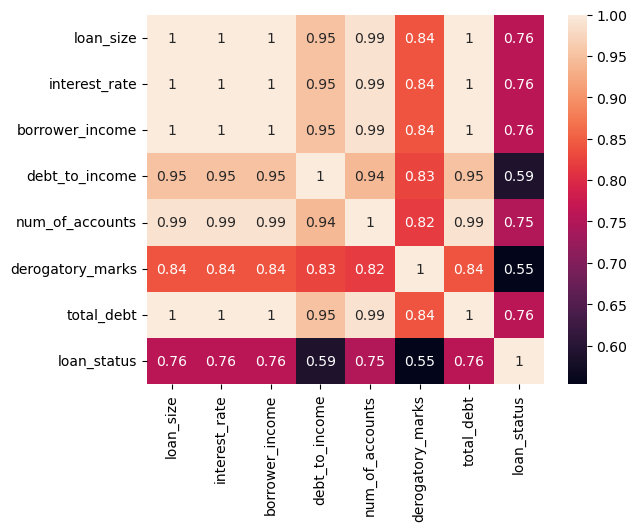

In [8]:
sns.heatmap(corrs, annot=True)
plt.show()

In [9]:
abs(corrs.loan_status).sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [10]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop(columns=["loan_status"])


In [11]:
# Review the y variable Series
print("Labels (y) preview:")
print(y.head())


Labels (y) preview:
0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


In [12]:
# Review the X variable DataFrame
print("\nFeatures (X) preview:")
print(X.head())
X.info()



Features (X) preview:
   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  
2                 0       16100  
3                 1       22700  
4                 1       23000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [13]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# stratify ensures same % of the target classes in the train/test for Imbalanced dataframe/sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_model = LogisticRegression(random_state=1)


# Fit the model using training data
log_model.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [15]:
# Make a prediction using the testing data
y_pred = log_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[14948    60]
 [   33   467]]


In [17]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.93      0.91       500

    accuracy                           0.99     15508
   macro avg       0.94      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



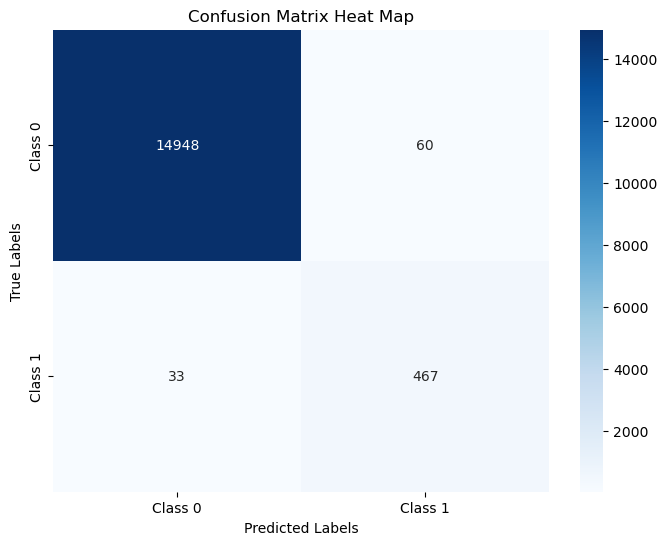

In [18]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heat Map')
plt.show()

## Extra Analysis directed by Instructor A. Booth.
## Additional models and analysis through starter Code.

--------------------------------------------------------------------------------------------

In [20]:
# Starter Code provided by instructor 
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    # Plot heat map using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heat Map')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[59696   332]
 [  130  1870]]
    
    AUC: 0.9945732949623509

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.94      0.89      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.96      0.94     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14948    60]
 [   33   467]]
    
    AUC: 0.9964005863539447

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.93      0.91       500

    accuracy                           0.99     15508
   macro avg       0.94      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508

    


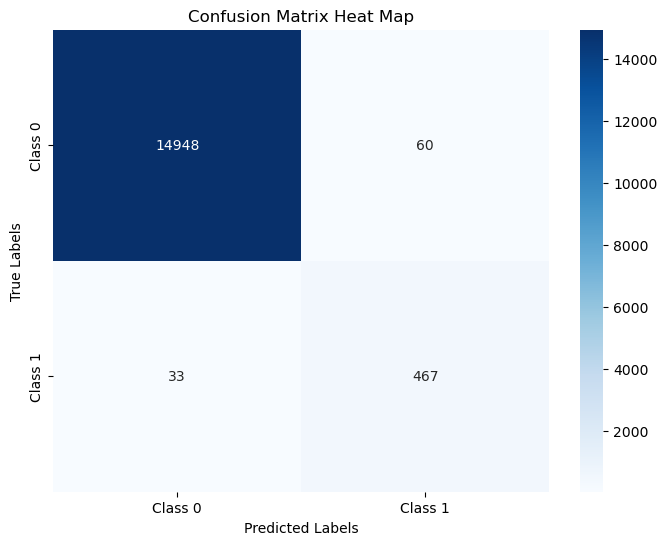

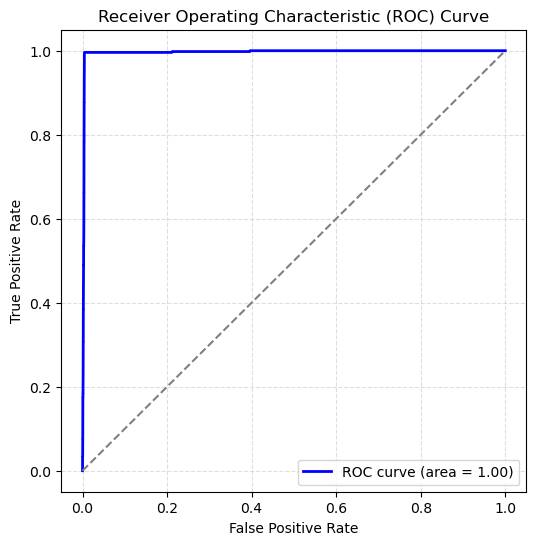

In [21]:
# Logistic Regression
# lr = LogisticRegression(penalty="l1", solver="liblinear")
lr = LogisticRegression()

# Run Model
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59697   331]
 [   29  1971]]
    
    AUC: 0.9972354984340641

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.86      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [   15   485]]
    
    AUC: 0.9959011194029851

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.88      0.97      0.92       500

    accuracy                           0.99     15508
   macro avg       0.94      0.98      0.96     15508
weighted avg       1.00      0.99      1.00     15508

    


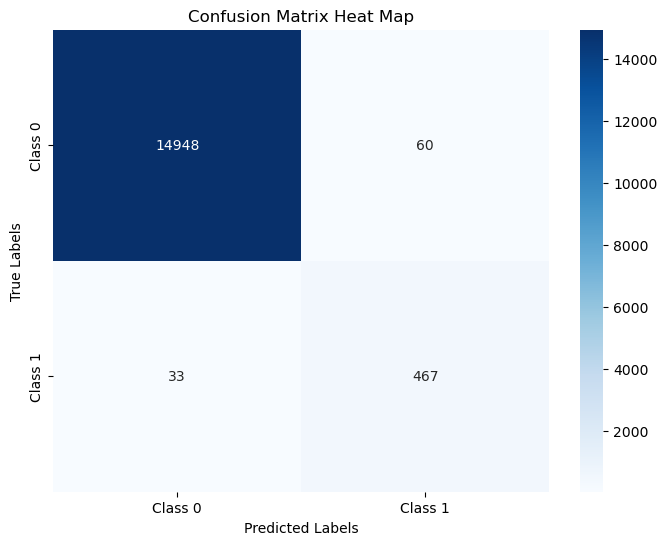

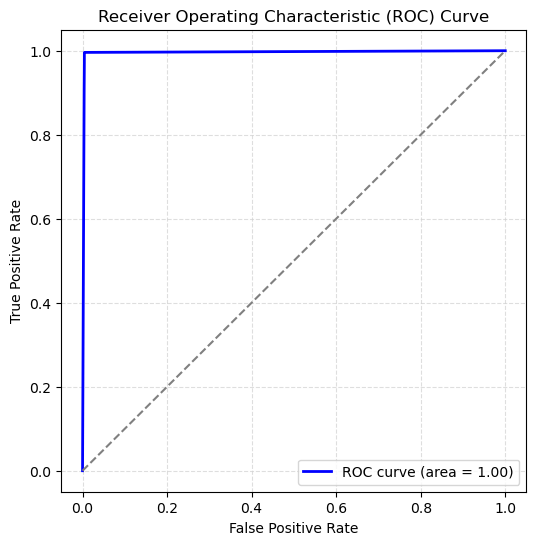

In [22]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7)

# Run Model
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59889   139]
 [   34  1966]]
    
    AUC: 0.9998063986806157

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.93      0.98      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.97      0.99      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14957    51]
 [   77   423]]
    
    AUC: 0.9959311034115138

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00     15008
           1       0.89      0.85      0.87       500

    accuracy                           0.99     15508
   macro avg       0.94      0.92      0.93     15508
weighted avg       0.99      0.99      0.99     15508

    


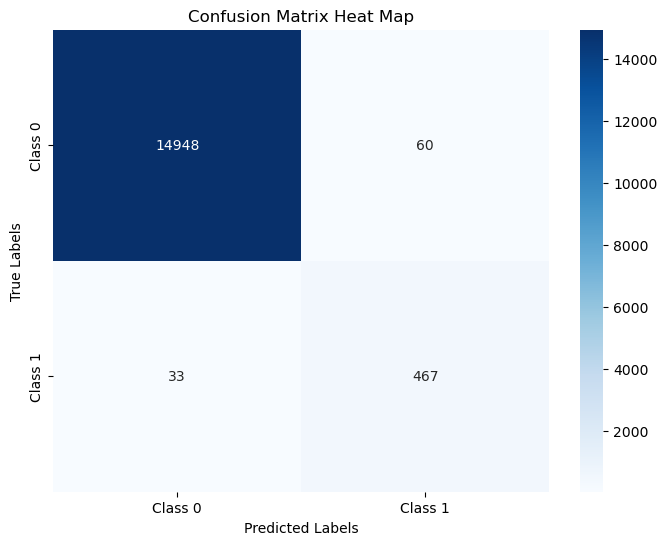

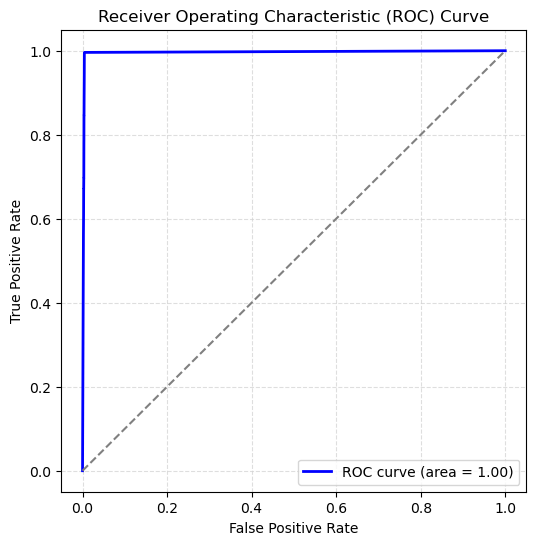

In [23]:
 # Random Forrest Model
rf = RandomForestClassifier(random_state=42)

# Run Model
doClassification(rf, X_train, X_test, y_train, y_test)

In [24]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[59679   349]
 [   14  1986]]
    
    AUC: 0.9977960535083629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    4   496]]
    
    AUC: 0.995082289445629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


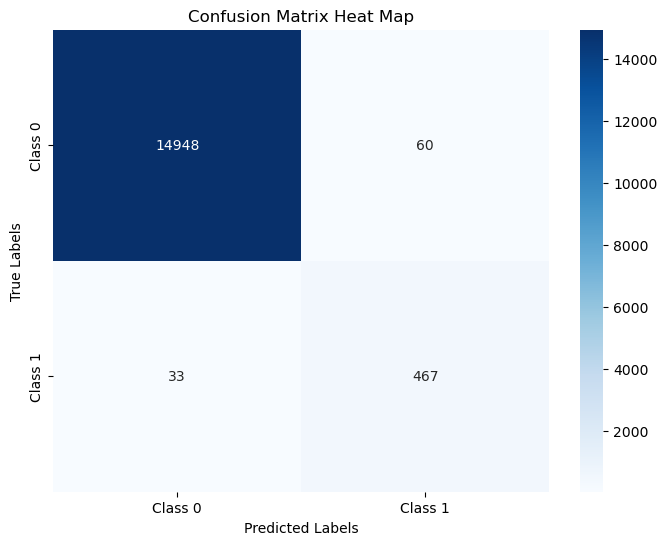

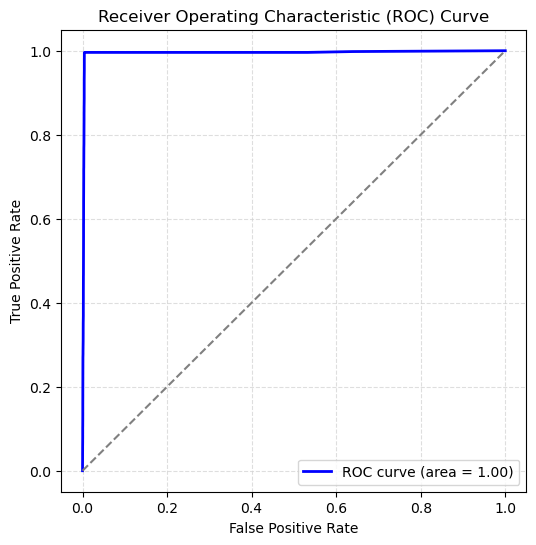

In [25]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42)

# Run Model
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59680   348]
 [   14  1986]]
    
    AUC: 0.9980409767108682

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    5   495]]
    
    AUC: 0.9958017057569296

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


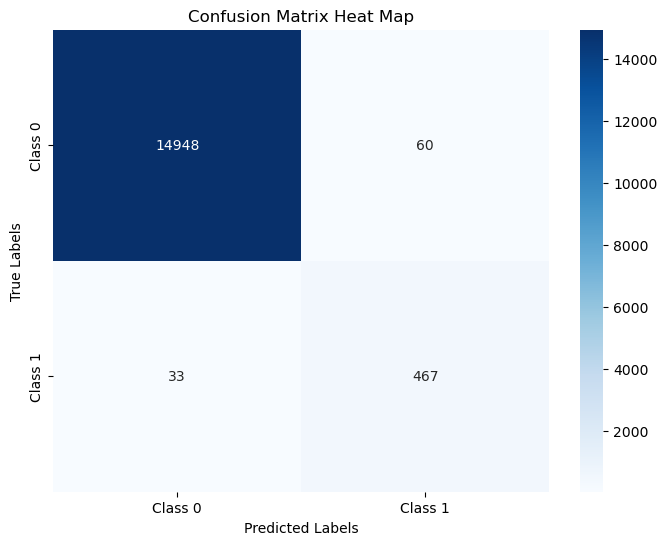

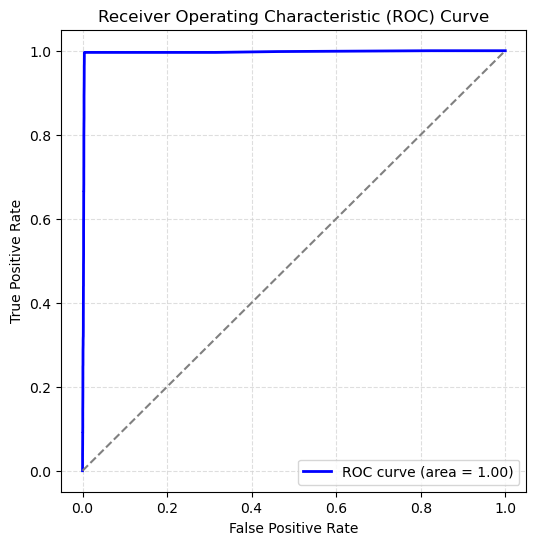

In [26]:
# Light GBM Classifier
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Run Model
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [27]:
# fi= Feature Importance
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,loan_size,0.980418
1,interest_rate,0.007376
4,num_of_accounts,0.006513
2,borrower_income,0.005693
3,debt_to_income,0.000000
5,derogatory_marks,0.000000
6,total_debt,0.000000


In [28]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,loan_size,0.491333
1,interest_rate,0.237000
2,borrower_income,0.230333
4,num_of_accounts,0.038667
5,derogatory_marks,0.002667
3,debt_to_income,0.000000
6,total_debt,0.000000


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 
The model performs perfectly on **Class 0** (likely due to its dominance in the dataset) and for **Class 1**, the model is quite good (F1-score = 0.91), though **precision (0.89)** is slightly lower than **recall (0.93)**, meaning the model makes some false positive errors (misclassifying Class 0 as Class 1). 
Since the dataset is highly **imbalanced**, there might be high bias toward the majority value (Class 0 - Healthy Loan). The other models used (as recommended by Instructor) also performed well. The following models were used with short summary of results:
- KNN performed well and is explainable - but the large dataset slows it's performance.
- Random forest overfits and performs worse than the linear model with an accuracy of 99%.
- XGBOOST has best metrics BUT, the feature importances are biased.
- LGBM has better performance but losses explainability with varied feature importances and has comparable performance to XGBoost and Logistic Regression.

---